In [2]:
# Basic operations
import numpy as np
import pandas as pd
import gensim
from importlib import reload

# LDA
from collections import Counter

# aesthetics
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from source import topic_modelling as tm

C:\Python_files\zipf-law-for-information-theory\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
"""
First, we will perform classical exploratory analysis.
"""

df = pd.read_pickle('dfs/preprocessed-cleaned-df.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54190 entries, 0 to 11903
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt           54190 non-null  object
 1   professor        54190 non-null  object
 2   student          54190 non-null  object
 3   professor_clean  54190 non-null  object
 4   student_clean    54190 non-null  object
 5   prompt_clean     54190 non-null  object
dtypes: object(6)
memory usage: 2.9+ MB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt           83 non-null     object
 1   professor        83 non-null     object
 2   student          83 non-null     object
 3   professor_clean  83 non-null     object
 4   student_clean    83 non-null     object
 5   prompt_clean     83 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


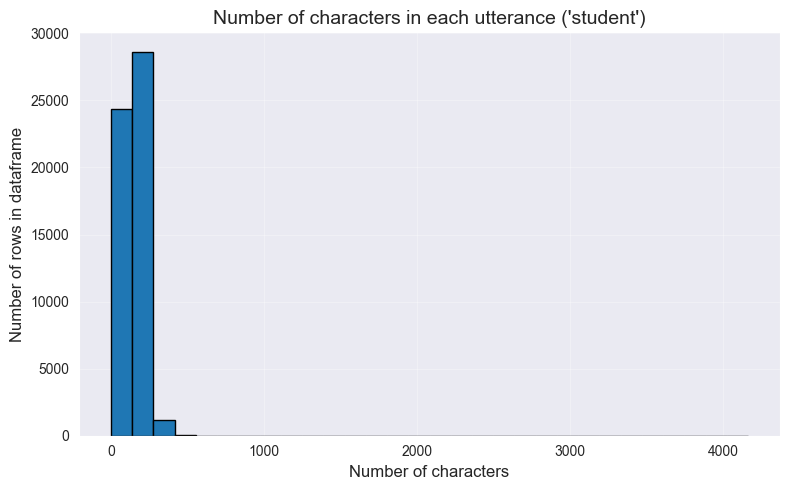

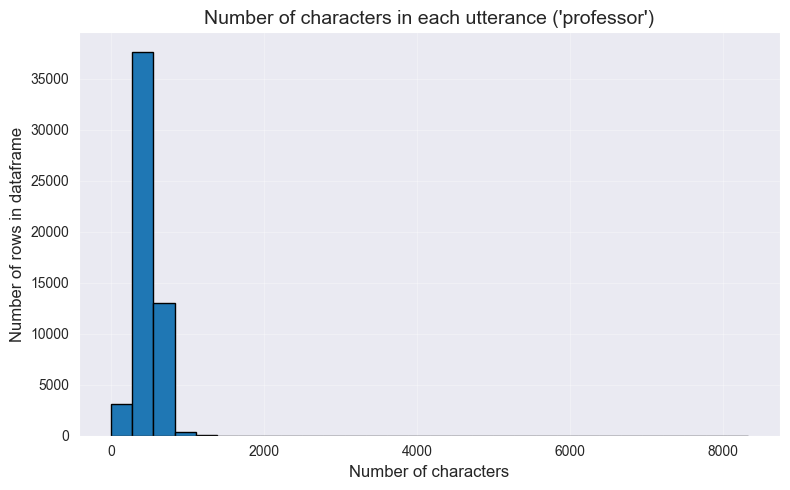

In [7]:
# number of characters in each utterance of each speaker
for column in ['student', 'professor']:
    plt.figure(figsize=(8, 5))
    df[column].str.len().hist(bins=30, edgecolor='black')
    plt.title(f"Number of characters in each utterance ('{column}')", fontsize=14)
    plt.xlabel("Number of characters", fontsize=12)
    plt.ylabel("Number of rows in dataframe", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Python_files\zipf-law-for-information-theory\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python_files\zipf-law-for-information-theory\.venv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


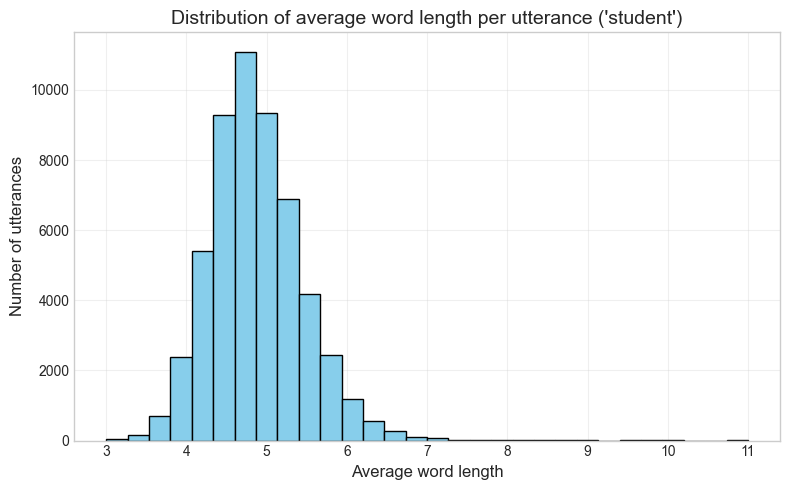

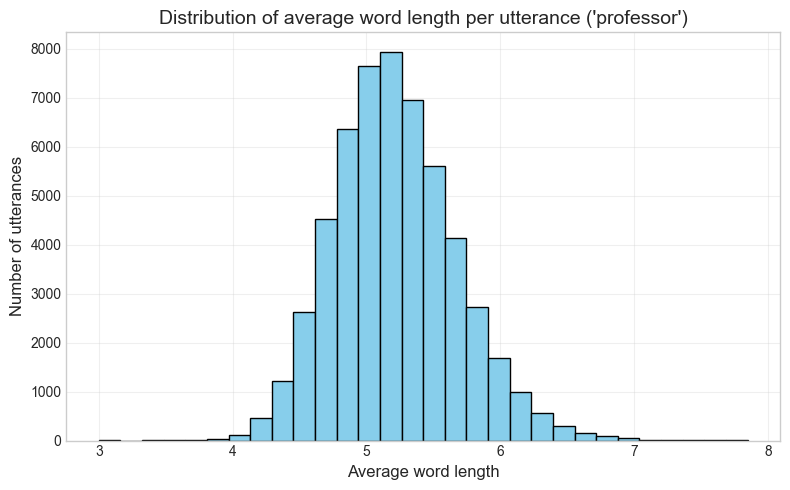

In [8]:
# distribution of average word length per utterance
plt.style.use('seaborn-v0_8-whitegrid')
for column in ['student', 'professor']:
    plt.figure(figsize=(8, 5))
    df[column].str.split() \
        .apply(lambda x: [len(i) for i in x]) \
        .map(np.mean) \
        .hist(bins=30, edgecolor='black', color='skyblue')

    plt.title(f"Distribution of average word length per utterance ('{column}')", fontsize=14)
    plt.xlabel("Average word length", fontsize=12)
    plt.ylabel("Number of utterances", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\quiz0\AppData\Local\Temp\ipykernel_10256\2081902539.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


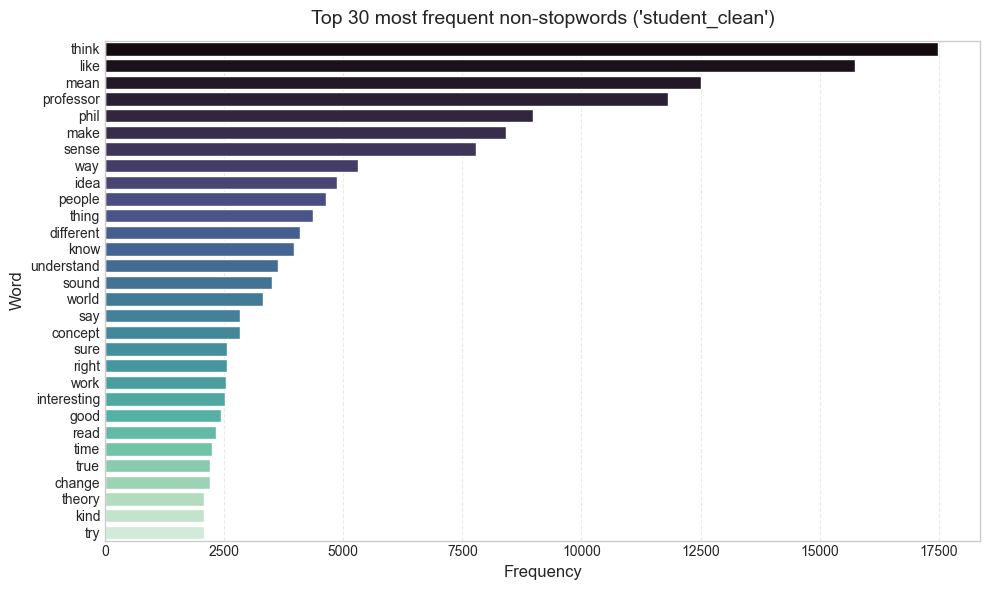

C:\Users\quiz0\AppData\Local\Temp\ipykernel_10256\2081902539.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


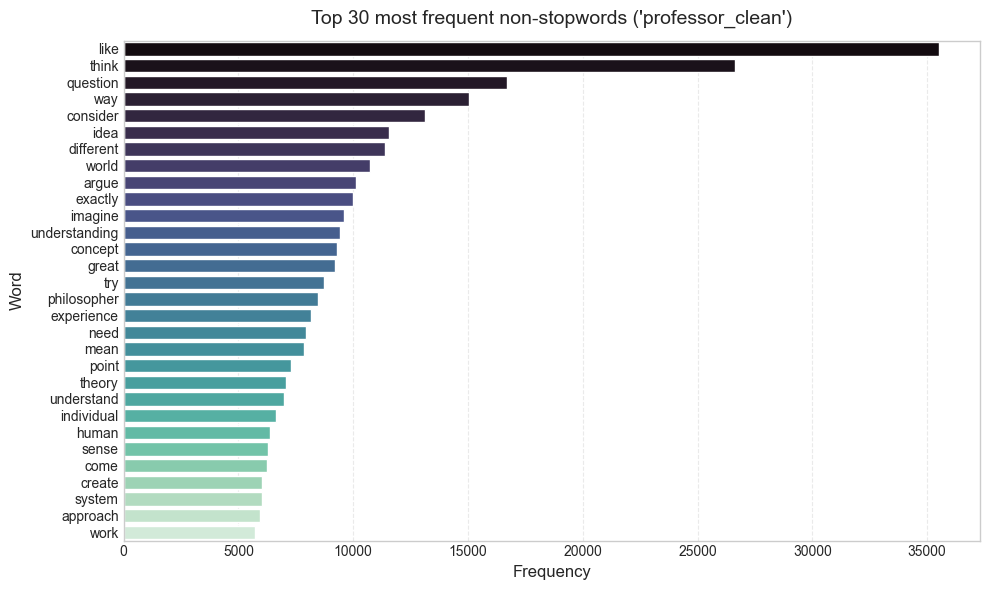

In [9]:
# The 30 most popular words
for column in ['student_clean', 'professor_clean']:
    corpus = [word for lemmas in df[column] for word in lemmas]
    counter=Counter(corpus)
    most=counter.most_common(30)
    words, counts = zip(*most)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="mako")
    plt.title(f"Top {30} most frequent non-stopwords ('{column}')", fontsize=14, pad=12)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [10]:
"""
Now it's time for topic modelling
"""
texts = df['professor_clean'] + df['student_clean']
dic=gensim.corpora.Dictionary(texts)
bow_corpus = [dic.doc2bow(doc) for doc in texts] # BOW

[I 2026-01-18 11:06:24,395] A new study created in memory with name: LDA-topic-modelling
[I 2026-01-18 11:07:03,824] Trial 0 finished with value: 0.4279845291195744 and parameters: {'num_topics': 9}. Best is trial 0 with value: 0.4279845291195744.
[I 2026-01-18 11:07:43,811] Trial 1 finished with value: 0.42167739845313423 and parameters: {'num_topics': 20}. Best is trial 0 with value: 0.4279845291195744.
[I 2026-01-18 11:08:24,037] Trial 2 finished with value: 0.4233487305139027 and parameters: {'num_topics': 11}. Best is trial 0 with value: 0.4279845291195744.
[I 2026-01-18 11:09:03,144] Trial 3 finished with value: 0.4230030691537865 and parameters: {'num_topics': 4}. Best is trial 0 with value: 0.4279845291195744.
[I 2026-01-18 11:09:42,270] Trial 4 finished with value: 0.4169678524776233 and parameters: {'num_topics': 8}. Best is trial 0 with value: 0.4279845291195744.
[I 2026-01-18 11:10:21,292] Trial 5 finished with value: 0.4332077008690433 and parameters: {'num_topics': 8}. Be

Best trial: {'num_topics': 14}


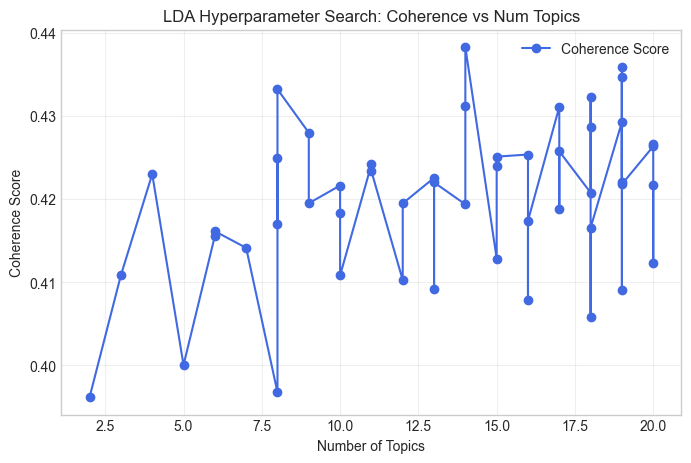

In [11]:
# Search the space for the best solution
ev_metric = tm.find_best_LDA(
    corpus=bow_corpus,
    id2word=dic,
    passes=10,
    texts=texts,
    coherence='c_v',
    n_trials=50
)
ev_metric.to_csv(f'dfs/LDA_ev_metric.csv')

In [12]:
print(ev_metric.head())

   number  coherence_score             datetime_start  \
0       0         0.427985 2026-01-18 11:06:24.396154   
1       1         0.421677 2026-01-18 11:07:03.825566   
2       2         0.423349 2026-01-18 11:07:43.812427   
3       3         0.423003 2026-01-18 11:08:24.038524   
4       4         0.416968 2026-01-18 11:09:03.145098   

           datetime_complete               duration  params_num_topics  \
0 2026-01-18 11:07:03.824649 0 days 00:00:39.428495                  9   
1 2026-01-18 11:07:43.811667 0 days 00:00:39.986101                 20   
2 2026-01-18 11:08:24.037441 0 days 00:00:40.225014                 11   
3 2026-01-18 11:09:03.144374 0 days 00:00:39.105850                  4   
4 2026-01-18 11:09:42.270719 0 days 00:00:39.125621                  8   

      state  
0  COMPLETE  
1  COMPLETE  
2  COMPLETE  
3  COMPLETE  
4  COMPLETE  


In [13]:
# Run the best LDA model
best_lda = tm.create_LDA_model(corpus=bow_corpus,
                                num_topics=9,
                                id2word=dic,
                                passes=100)

In [14]:
# Plot the results
tm.plot_lda_vis(lda_model=best_lda,
                corpus=bow_corpus,
                dic=dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.007136 -0.118754       1        1  15.064174
1     -0.008246 -0.082739       2        1  13.231383
0      0.066809 -0.079369       3        1  12.402564
7     -0.166365  0.046887       4        1  11.587037
5     -0.132663  0.118021       5        1  11.447830
3     -0.099835  0.068146       6        1   9.585268
4      0.016233 -0.170829       7        1   9.546968
8      0.156597  0.075994       8        1   9.495793
6      0.174606  0.142643       9        1   7.638983, topic_info=           Term          Freq         Total Category  logprob  loglift
29    professor  11905.000000  11905.000000  Default  30.0000  30.0000
482       moral   6879.000000   6879.000000  Default  29.0000  29.0000
139        phil   9042.000000   9042.000000  Default  28.0000  28.0000
1387        map   5562.000000   5562.000000  Default  27.0000  27.0000
2493      logic   5420.000000   5420.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
169       point    883.751063   9270.046379   Topic9  -5.3711   0.2215
86         make    844.479543  13406.525662   Topic9  -5.4166  -0.1929
15         find    771.705949   4011.276131   Topic9  -5.5067   0.9236
168      people    794.704062   8677.233057   Topic9  -5.4774   0.1814
44          try    774.533486  10730.519624   Topic9  -5.5031  -0.0567

[717 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
592        1  0.005197       act
592        3  0.199390       act
592        4  0.112925       act
592        5  0.585885       act
592        6  0.031184       act
...      ...       ...       ...
65         5  0.640634     wrong
65         6  0.265691     wrong
65         8  0.011284     wrong
65         9  0.064115     wrong
13080      1  0.977540  zhuangzi

[1747 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 8, 6, 4, 5, 9, 7])

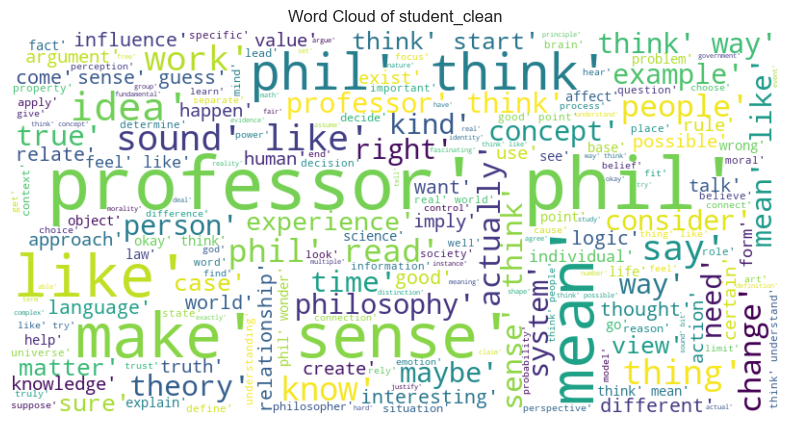

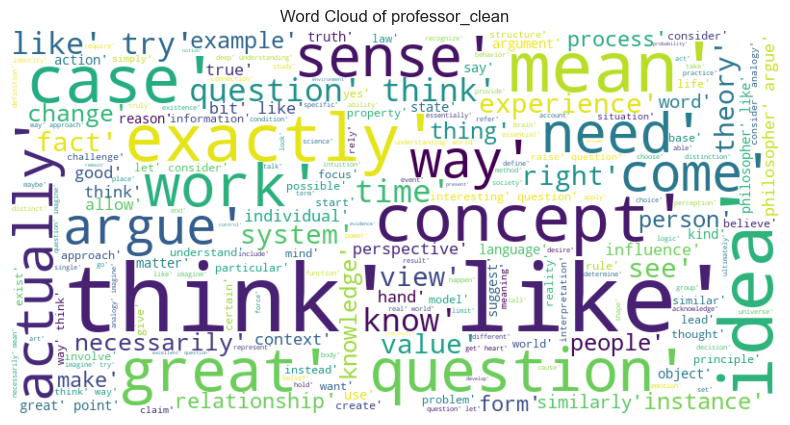

In [15]:
# Generate wordcloud
for column in ['student_clean', 'professor_clean']:
    wd_text = " ".join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wd_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of {column}")
    plt.show()

In [16]:
"""
3) Compute Zip's law distribution
"""
from source import zipfslaw as zl

print("-----------------")
print("| Zipf's Law    |")

try:
    with open("dfs/preprocessed-df.csv", "r", encoding="latin-1") as f:
        text = f.read()
        f.close()
        zipf_table = zl.generate_zipf_table(text, 200)
        zl.print_zipf_table(zipf_table)
except IOError as e:
    print(e)

-----------------
| Zipf's Law    |
--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|the         |        2299|         1/1|     2299.00|        0.00| 100.00%|
|   2|of          |        1600|         1/2|     1149.50|      450.50| 139.19%|
|   3|a           |        1289|         1/3|      766.33|      522.67| 168.20%|
|   4|to          |        1258|         1/4|      574.75|      683.25| 218.88%|
|   5|that        |         995|         1/5|      459.80|      535.20| 216.40%|
|   6|and         |         959|         1/6|      383.17|      575.83| 250.28%|
|   7|is          |         783|         1/7|      328.43|      454.57| 238.41%|
|   8|in          |         770|         1/8|      287.38|      482.62| 267.94%|
|   9|it          |         465|         1/9|      255.44|      209.56| 1

C:\Python_files\zipf-law-for-information-theory\source\zipfslaw.py:27: SyntaxWarning: invalid escape sequence '\]'
  !\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789
C:\Python_files\zipf-law-for-information-theory\source\zipfslaw.py:31: SyntaxWarning: invalid escape sequence '\]'
  chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"


In [5]:
# df = df.head(50)

In [16]:
df = pd.read_pickle('dfs/preprocessed-cleaned-df.pkl')

In [26]:
"""
4) Let's compute entropy
"""
# set ID for each conversation
df['conversation_id'] = df.index

# index for each row
df['row_id'] = np.arange(len(df)) + 1
df.set_index('row_id', inplace=True)
# df.groupby('ID').mean()


In [28]:
"""
4.1) Entropy on the char level
"""
from source import entropy as ep
reload(ep)
df = ep.compute_entropy_dataset(df, ['student', 'professor'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54190 entries, 1 to 54190
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prompt           54190 non-null  object 
 1   professor        54190 non-null  object 
 2   student          54190 non-null  object 
 3   professor_clean  54190 non-null  object 
 4   student_clean    54190 non-null  object 
 5   prompt_clean     54190 non-null  object 
 6   student_ent      54190 non-null  float64
 7   professor_ent    54190 non-null  float64
 8   conversation_id  54190 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 4.1+ MB


<Axes: title={'center': 'Entropy of the student vs entropy of the professor (char level)'}, xlabel="Professor's entropy", ylabel="Student's entropy">

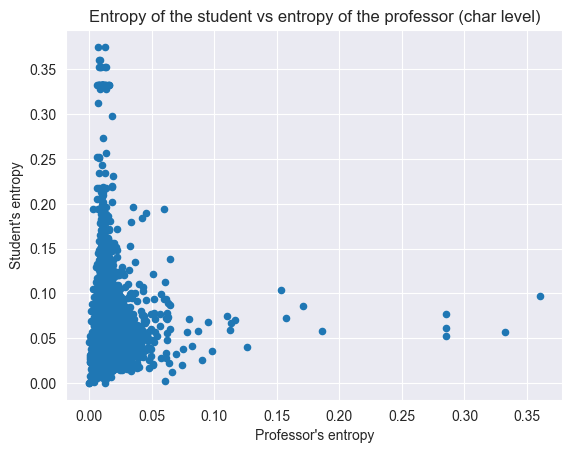

In [34]:
df.plot(kind='scatter', x='professor_ent', y='student_ent',xlabel="Professor's entropy", ylabel="Student's entropy", title="Entropy of the student vs entropy of the professor (char level)")

In [21]:
df.sort_values('professor_ent', ascending=False, inplace=False).head(5)

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id
row_id,,,,,,,,,
18055,\n Perhaps the best known attack on the sugges...,Me too.,I look forward to exploring that further.,[],"[look, forward, explore]","[well, know, attack, suggestion, ture, test, p...",0.09692,0.36023,4038
52390,\n We find ourselves naturally inclined to mak...,Of course.,"Alright, I think I'll have to mull this over. ...",[course],"[alright, think, mull, ask, question]","[find, naturally, inclined, certain, judgment,...",0.05638,0.33219,11633
53114,\n\n At the end of 1937 Prior set aside though...,My pleasure!,"Thank you for such insightful discussions, Pro...",[pleasure],"[thank, insightful, discussion, professor]","[end, prior, set, aside, thought, academic, ca...",0.07670,0.28486,11747
6016,\n A closely related feature is that most conc...,My pleasure!,I'd love to explore that more in our next conv...,[pleasure],"[love, explore, conversation, thank, professor...","[closely, relate, feature, conception, common,...",0.05203,0.28486,1313
25726,The idea of the moral point of view can be tra...,My pleasure!,"Alright, I think I see how it could be useful....",[pleasure],"[alright, think, useful, thank, professor, phil]","[idea, moral, point, view, trace, david, hume,...",0.06142,0.28486,5763


In [22]:
df.sort_values('student_ent', ascending=False, inplace=False).head(5)

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id
row_id,,,,,,,,,
2137,\n Amartya Sen extended Arrow’s framework by ...,"Well, imagine that we have two people, Alice a...",Why not?,"[imagine, people, alice, bob, ask, rate, prefe...",[],"[amartya, sen, extend, arrow, framework, repre...",0.37500,0.00730,463
50389,\n\n How might one reply to the arguments for ...,"For instance, think about sentences like ""It i...",Such as?,"[instance, think, sentence, like, rain, god, e...",[],"[reply, argument, proposition, discuss, reply,...",0.37500,0.01304,11283
32506,\n The emergence of systems biology and synthe...,Consider the traditional hypothesis-driven app...,How so?,"[consider, traditional, hypothesis, drive, app...",[],"[emergence, system, biology, synthetic, biolog...",0.36023,0.00808,7288
26868,\n Women were probably more active in Pythagor...,"Well, if we look at the Pythagorean movement, ...",How so?,"[look, pythagorean, movement, woman, equally, ...",[],"[woman, probably, active, pythagoreanism, anci...",0.36023,0.00910,6019
45083,\n\n Versions of the Fregean argument are some...,"Well, some philosophers argue that just becaus...",Like who?,"[philosopher, argue, use, mathematical, langua...",[like],"[versions, fregean, argument, state, term, not...",0.35221,0.00931,10108


In [23]:
df.sort_values(['student_ent', 'professor_ent'], ascending=False, inplace=False).head(5)

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id
row_id,,,,,,,,,
50389,\n\n How might one reply to the arguments for ...,"For instance, think about sentences like ""It i...",Such as?,"[instance, think, sentence, like, rain, god, e...",[],"[reply, argument, proposition, discuss, reply,...",0.37500,0.01304,11283
2137,\n Amartya Sen extended Arrow’s framework by ...,"Well, imagine that we have two people, Alice a...",Why not?,"[imagine, people, alice, bob, ask, rate, prefe...",[],"[amartya, sen, extend, arrow, framework, repre...",0.37500,0.00730,463
26868,\n Women were probably more active in Pythagor...,"Well, if we look at the Pythagorean movement, ...",How so?,"[look, pythagorean, movement, woman, equally, ...",[],"[woman, probably, active, pythagoreanism, anci...",0.36023,0.00910,6019
32506,\n The emergence of systems biology and synthe...,Consider the traditional hypothesis-driven app...,How so?,"[consider, traditional, hypothesis, drive, app...",[],"[emergence, system, biology, synthetic, biolog...",0.36023,0.00808,7288
6088,\n Compatibilism’s place in contemporary philo...,"Well, imagine three gardeners, each nurturing ...",Like who?,"[imagine, gardener, nurture, different, branch...",[like],"[compatibilism, place, contemporary, philosoph...",0.35221,0.01377,1329


In [25]:
# high for student and professor
student_threshold = df['student_ent'].quantile(0.95)
professor_threshold = df['professor_ent'].quantile(0.95)

high_entropy= df[
    (df['student_ent'] >= student_threshold) &
    (df['professor_ent'] >= professor_threshold)
]

high_entropy.head()

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id
row_id,,,,,,,,,
207,Two doctrines dominate philosophical and psych...,Exactly! That's the beauty of philosophy – it ...,I never thought about it that way.,"[exactly, beauty, philosophy, encourage, quest...","[think, way]","[doctrine, dominate, philosophical, psychologi...",0.10938,0.01699,48
272,\n\n Whether or not the non-locality predicted...,"Yes, it is. The debate continues, and it's an ...","So, it's still an open question?","[yes, debate, continue, active, area, research...","[open, question]","[non, locality, predict, quantum, theory, clas...",0.11779,0.02031,62
393,The debate over adaptationism is often traced ...,"You see, this debate is not just about the sci...","I think I'm starting to get it. Thanks, Profes...","[debate, scientific, fact, understanding, evol...","[think, start, thank, professor, phil]","[debate, adaptationism, trace, paper, stephen,...",0.07501,0.01887,89
452,\n\n The most straightforward challenge emphas...,I'm glad I could help clarify things for you! ...,That makes a lot of sense. I never thought abo...,"[glad, help, clarify, thing, philosophy, chall...","[make, lot, sense, think, way]","[straightforward, challenge, emphasize, decisi...",0.06474,0.02214,101
563,"3.3 Disappearing agents, naturalism, and dual ...",Exactly! That's the whole point of philosophy ...,"Alright, Professor, I think I need to think ab...","[exactly, point, philosophy, question, assumpt...","[alright, professor, think, need, think]","[disappear, agent, naturalism, dual, standpoin...",0.06459,0.02047,126


In [33]:
"""
4.2) Entropy on the word level
"""
from source import entropy as ep
reload(ep)
df = ep.compute_entropy_dataset(df, ['professor_clean', 'student_clean'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54190 entries, 1 to 54190
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prompt               54190 non-null  object 
 1   professor            54190 non-null  object 
 2   student              54190 non-null  object 
 3   professor_clean      54190 non-null  object 
 4   student_clean        54190 non-null  object 
 5   prompt_clean         54190 non-null  object 
 6   student_ent          54190 non-null  float64
 7   professor_ent        54190 non-null  float64
 8   conversation_id      54190 non-null  int64  
 9   professor_clean_ent  54190 non-null  float64
 10  student_clean_ent    54190 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.0+ MB


<Axes: title={'center': 'Entropy of the student vs entropy of the professor (world level)'}, xlabel="Professor's entropy", ylabel="Student's entropy">

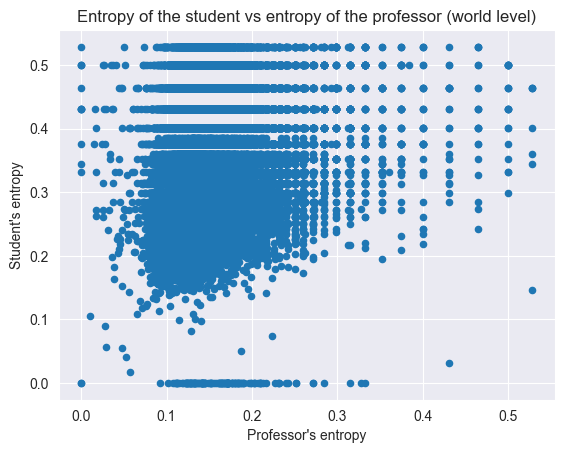

In [35]:
df.plot(kind='scatter', x='professor_clean_ent', y='student_clean_ent',xlabel="Professor's entropy", ylabel="Student's entropy", title="Entropy of the student vs entropy of the professor (world level)")


In [36]:
df.sort_values('professor_clean_ent', ascending=False, inplace=False).head(5)

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id,professor_clean_ent,student_clean_ent
row_id,,,,,,,,,,,
52689,\n The dual framework ‘proximate vs. ultimate’...,"That's the power of philosophy, my friend!","That's really inspiring, Professor. I never th...","[power, philosophy, friend]","[inspiring, professor, think, abstract, concep...","[dual, framework, proximate, ultimate, provide...",0.03609,0.09833,52689,0.52832,0.40105
7210,\n\n \t \t\t \t\t\tP1. \t\t\tI don’t know that...,Excellent! That's all anyone can ask for in ph...,"Yeah, I think so. I need to think about it som...","[excellent, ask, philosophy]","[yeah, think, need, think, feel, like, well, h...","[know, know, know, know, constitute, puzzle, p...",0.03778,0.07500,7210,0.52832,0.34375
21542,3.2 Totality and Revolution It is easy to see ...,"The pleasure is mine, my inquisitive student!","Thank you, Professor Phil. This conversation h...","[pleasure, inquisitive, student]","[thank, professor, phil, conversation, enlight...","[totality, revolution, easy, result, conceptio...",0.05810,0.08708,21542,0.52832,0.46439
24395,"\n Mach, James, and Russell agree that neutral...","That's what I'm here for. Now, go think about ...","Thank you, Professor. You've given me a lot to...","[think, challenge, thought]","[thank, professor, give, lot, think]","[mach, james, russell, agree, neutral, monism,...",0.07180,0.05304,24395,0.52832,0.46439
10057,\n The first book-length study thematizing Du ...,"No problem, I'm glad I could help!","Thanks, Professor. That really helps clarify t...","[problem, glad, help]","[thank, professor, help, clarify, thing]","[book, length, study, thematize, boisian, doub...",0.07077,0.11653,10057,0.52832,0.46439


In [38]:
df.sort_values(['student_clean_ent', 'professor_ent'], ascending=False, inplace=False).head(5)

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id,professor_clean_ent,student_clean_ent
row_id,,,,,,,,,,,
18055,\n Perhaps the best known attack on the sugges...,Me too.,I look forward to exploring that further.,[],"[look, forward, explore]","[well, know, attack, suggestion, ture, test, p...",0.09692,0.36023,18055,1.000000e-10,0.52832
14336,\n Jeremy Bentham’s Handbook of Political Fall...,"It was a thought-provoking conversation, keep ...","Alright, thank you, Professor.","[thought, provoke, conversation, think, critic...","[alright, thank, professor]","[jeremy, bentham, handbook, political, fallaci...",0.13882,0.06440,14336,4.643900e-01,0.52832
16286,\n Hazlitt famously described Godwin’s reputat...,"My pleasure, always happy to explore these com...","Professor, that's really helpful. Thank you.","[pleasure, happy, explore, complex, idea]","[professor, helpful, thank]","[hazlitt, famously, describe, godwin, reputati...",0.09405,0.06129,16286,4.643900e-01,0.52832
9597,\n In the second half of the twentieth century...,No problem at all – it's great to see you thin...,That's fascinating. Thank you for explaining i...,"[problem, great, think, critically, concept]","[fascinating, thank, explain]","[second, half, twentieth, century, rapid, deve...",0.07722,0.04932,9597,4.643900e-01,0.52832
31388,\n The first non-spatiotemporal symmetry to be...,"Indeed, it is. And I think we've only just beg...","I see. So, it's a complex topic that's still b...","[think, begin, unravel, puzzle, sameness, phys...","[complex, topic, explore]","[non, spatiotemporal, symmetry, introduce, mic...",0.06870,0.04523,31388,4.308300e-01,0.52832


In [41]:
# high for student and professor
student_threshold = df['student_clean_ent'].quantile(0.95)
professor_threshold = df['professor_clean_ent'].quantile(0.95)

high_clean_entropy= df[
    (df['student_clean_ent'] >= student_threshold) &
    (df['professor_clean_ent'] >= professor_threshold)
]

high_clean_entropy.head()

,prompt,professor,student,professor_clean,student_clean,prompt_clean,student_ent,professor_ent,conversation_id,professor_clean_ent,student_clean_ent
row_id,,,,,,,,,,,
207,Two doctrines dominate philosophical and psych...,Exactly! That's the beauty of philosophy – it ...,I never thought about it that way.,"[exactly, beauty, philosophy, encourage, quest...","[think, way]","[doctrine, dominate, philosophical, psychologi...",0.10938,0.01699,207,0.25000,0.50000
272,\n\n Whether or not the non-locality predicted...,"Yes, it is. The debate continues, and it's an ...","So, it's still an open question?","[yes, debate, continue, active, area, research...","[open, question]","[non, locality, predict, quantum, theory, clas...",0.11779,0.02031,272,0.26046,0.50000
353,\n\n It is natural to initially diagnose the d...,The distinction is crucial for moral judgments...,Actualism and possibilism? I've never heard of...,"[distinction, crucial, moral, judgment, prescr...","[actualism, possibilism, hear, term]","[natural, initially, diagnose, disagreement, a...",0.06396,0.01525,353,0.22549,0.50000
390,The debate over adaptationism is often traced ...,Exactly! And it's a debate that's been ongoing...,"So, it's like a debate then? With adaptationis...","[exactly, debate, ongoing, long, time, root, c...","[like, debate, adaptationist, pluralist]","[debate, adaptationism, trace, paper, stephen,...",0.04393,0.01622,390,0.23438,0.50000
393,The debate over adaptationism is often traced ...,"You see, this debate is not just about the sci...","I think I'm starting to get it. Thanks, Profes...","[debate, scientific, fact, understanding, evol...","[think, start, thank, professor, phil]","[debate, adaptationism, trace, paper, stephen,...",0.07501,0.01887,393,0.28465,0.46439
